In [26]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
pip install tables

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pyodbc
import os
import tables
import time

In [2]:
%matplotlib inline

In [11]:
SERVER_NAME = 'server.database.windows.net'
DATABASE_NAME = 'dbname'
USERID = 'dbadmin'
PASSWORD = 'dbpassword'
DB_DRIVER = 'SQL Server Native Client 11.0'

Create Database Connection

In [12]:
driver = 'DRIVER={' + DB_DRIVER + '}'
server = 'SERVER=' + SERVER_NAME 
database = 'DATABASE=' + DATABASE_NAME
uid = 'UID=' + USERID 
pwd = 'PWD=' + PASSWORD

In [32]:
CONNECTION_STRING = ';'.join([driver,server,database,uid,pwd, ';TDS_VERSION=7.3;Port=1433'])
print(CONNECTION_STRING)
conn = pyodbc.connect(CONNECTION_STRING)

DRIVER={SQL Server Native Client 11.0};SERVER=lp2020synapse.database.windows.net;DATABASE=LPSQLPool;UID=lpadmin;PWD=Sprache2000;;TDS_VERSION=7.3;Port=1433


In [33]:
nrows = pd.read_sql('''SELECT SUM(rows) FROM sys.partitions WHERE object_id = OBJECT_ID('dbo.nyc_trip_data2')''', conn)
print ('Total number of rows = %d' % nrows.iloc[0,0])

ncols = pd.read_sql('''SELECT count(*) FROM information_schema.columns WHERE table_name = ('nyc_trip_data2') AND table_schema = ('dbo')''', conn)
print ('Total number of columns = %d' % ncols.iloc[0,0])

Total number of rows = 28766791
Total number of columns = 14


In [20]:
nrows = pd.read_sql('''SELECT SUM(rows) FROM sys.partitions WHERE object_id = OBJECT_ID('dbo.nyctaxi_fare')''', conn)
print ('Total number of rows = %d' % nrows.iloc[0,0])

ncols = pd.read_sql('''SELECT count(*) FROM information_schema.columns WHERE table_name = ('nyctaxi_fare') AND table_schema = ('dbo')''', conn)
print ('Total number of columns = %d' % ncols.iloc[0,0])

Total number of rows = 1000
Total number of columns = 11


In [34]:
t0 = time.time()

#load only a small percentage of the joined data for some quick visuals
df1 = pd.read_sql('''select top 10000 t.*, f.payment_type, f.fare_amount, f.surcharge, f.mta_tax, 
      f.tolls_amount, f.total_amount, f.tip_amount 
      from dbo.nyc_trip_data2 t, dbo.nyctaxi_fare f where datepart("mi",t.pickup_datetime)=0 and t.medallion = f.medallion 
      and t.hack_license = f.hack_license and t.pickup_datetime = f.pickup_datetime''', conn)

t1 = time.time()
print ('Time to read the sample table is %f seconds' % (t1-t0))

print ('Number of rows and columns retrieved = (%d, %d)' % (df1.shape[0], df1.shape[1]))

Time to read the sample table is 9.033924 seconds
Number of rows and columns retrieved = (10000, 21)


In [35]:
df1['trip_distance'].describe()

count    10000.000000
mean         0.967720
std          0.325046
min          0.000000
25%          0.800000
50%          0.950000
75%          1.120000
max         13.500000
Name: trip_distance, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21e1ac3c6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x21e1ac3cdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e1ac3c390>],
 'medians': [<matplotlib.lines.Line2D at 0x21e1aca2518>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e1aca2898>],
 'means': []}

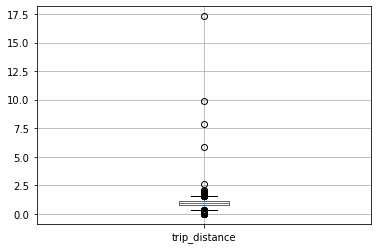

In [24]:
df1.boxplot(column='trip_distance',return_type='dict')

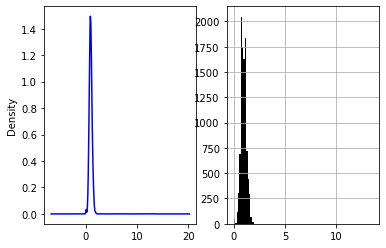

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
df1['trip_distance'].plot(ax=ax1,kind='kde', style='b-')
df1['trip_distance'].hist(ax=ax2, bins=100, color='k')

In [28]:

trip_dist_bins = [0, 1, 2, 4, 10, 1000]
df1['trip_distance']
trip_dist_bin_id = pd.cut(df1['trip_distance'], trip_dist_bins)
trip_dist_bin_id

0       (1, 2]
1       (1, 2]
2       (1, 2]
3       (0, 1]
4       (0, 1]
         ...  
9995    (0, 1]
9996    (0, 1]
9997    (0, 1]
9998    (0, 1]
9999    (1, 2]
Name: trip_distance, Length: 10000, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 4] < (4, 10] < (10, 1000]]

In [29]:
pd.Series(trip_dist_bin_id).value_counts()

(0, 1]        6405
(1, 2]        3583
(4, 10]          3
(2, 4]           2
(10, 1000]       1
Name: trip_distance, dtype: int64

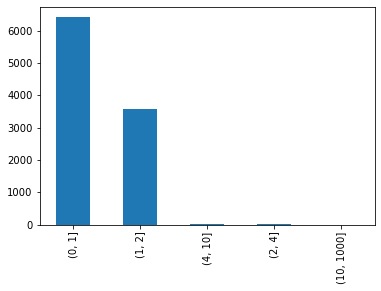

In [30]:
pd.Series(trip_dist_bin_id).value_counts().plot(kind='bar')